In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from collections import namedtuple

#from Plot_tools import *
from File_tools import *

import pickle

_nthreads = 2


In [64]:
# # FV3 test run

in_dir  = "/work/wicker/Odin_scr/solo"
out_dir = "/work/wicker/Odin_scr/solo"
prefix  = "squall_3km"

allcape = ("C1500", "C2000", "C2500", "C3000", "C3500")
allshear = ("06","12", "18")

solo = {}
cm1  = {}
wrf  = {}

for shear in allshear:
    for cape in allcape:
        
        label = "%s_%s" % (cape, shear)
        
        solo_file = str(os.path.join(in_dir, "%s_%s" % (prefix, label)))
        print(solo_file)
        solo[label] = read_model_fields(solo_file, filename='atmos_hifreq.nc', model_type='fv3_solo', precip_only=True)
        
        wrf_file = str(os.path.join("/work/wicker/WRF/WRF/test/em_quarter_ss", "%s_%s" % (prefix, label)))
        print(wrf_file)
        wrf[label] = read_model_fields(wrf_file, model_type='wrf', precip_only=True)
         
        cm1_file = str(os.path.join("/work/wicker/Odin_scr/cm1r20.3/run", "%s_%s" % (prefix, label)))
        print(cm1_file)
        cm1[label] = read_model_fields(cm1_file, model_type='cm1', precip_only=True)
                

/work/wicker/Odin_scr/solo/squall_3km_C1500_06
Reading:  /work/wicker/Odin_scr/solo/squall_3km_C1500_06/atmos_hifreq.nc 
/work/wicker/WRF/WRF/test/em_quarter_ss/squall_3km_C1500_06
Reading:  /work/wicker/WRF/WRF/test/em_quarter_ss/squall_3km_C1500_06/wrfout_d01_0001-01-01_00:00:00 
/work/wicker/Odin_scr/cm1r20.3/run/squall_3km_C1500_06
Reading:  /work/wicker/Odin_scr/cm1r20.3/run/squall_3km_C1500_06/cm1out.nc 
/work/wicker/Odin_scr/solo/squall_3km_C2000_06
Reading:  /work/wicker/Odin_scr/solo/squall_3km_C2000_06/atmos_hifreq.nc 
/work/wicker/WRF/WRF/test/em_quarter_ss/squall_3km_C2000_06
Reading:  /work/wicker/WRF/WRF/test/em_quarter_ss/squall_3km_C2000_06/wrfout_d01_0001-01-01_00:00:00 
/work/wicker/Odin_scr/cm1r20.3/run/squall_3km_C2000_06
Reading:  /work/wicker/Odin_scr/cm1r20.3/run/squall_3km_C2000_06/cm1out.nc 
/work/wicker/Odin_scr/solo/squall_3km_C2500_06
Reading:  /work/wicker/Odin_scr/solo/squall_3km_C2500_06/atmos_hifreq.nc 
/work/wicker/WRF/WRF/test/em_quarter_ss/squall_3km_

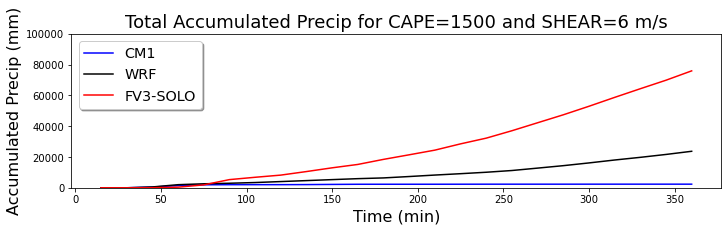

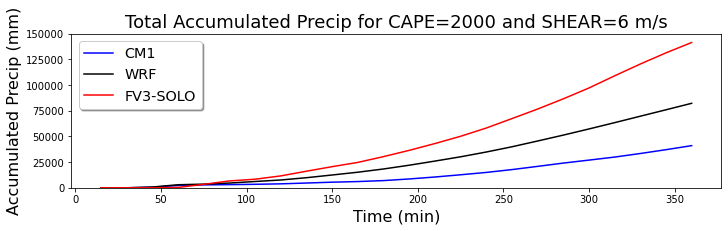

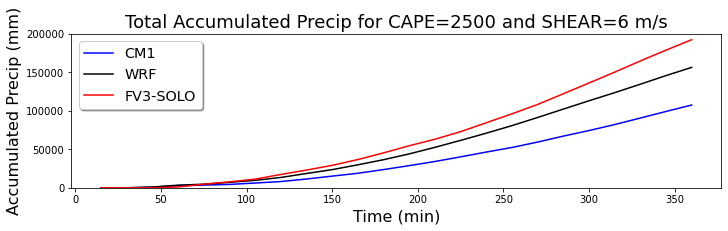

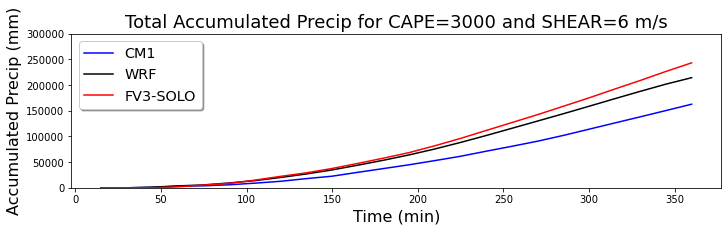

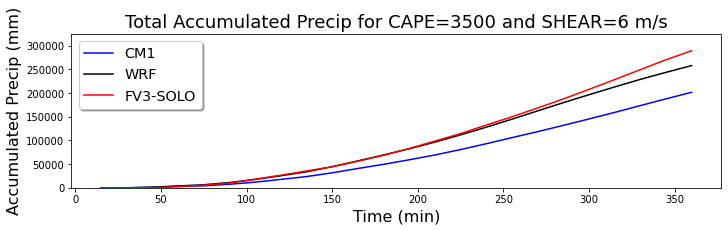

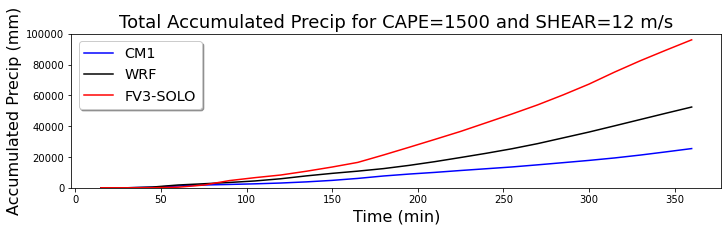

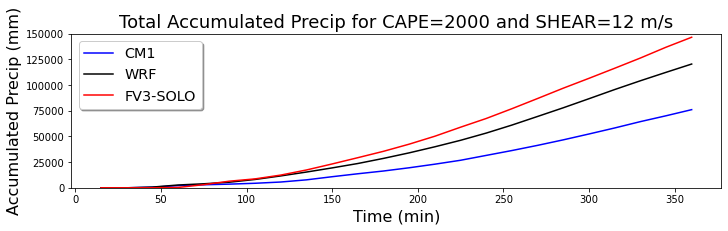

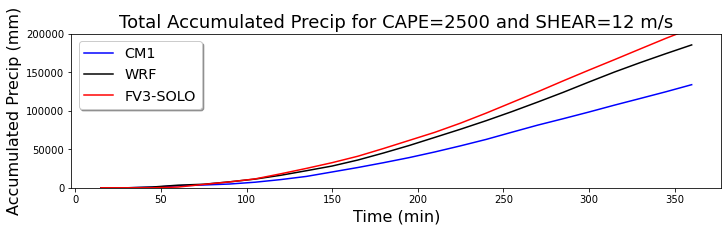

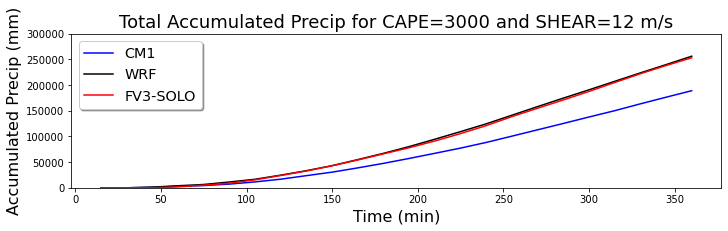

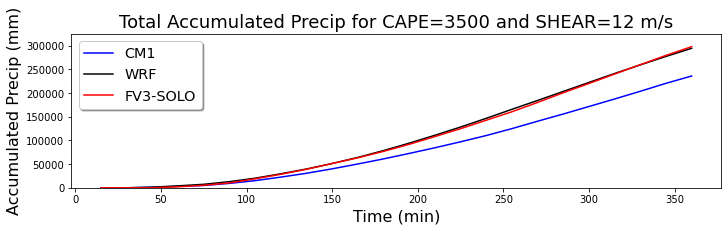

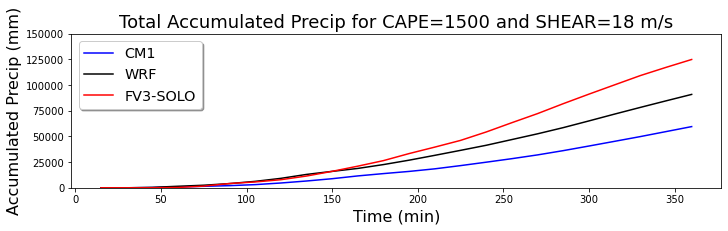

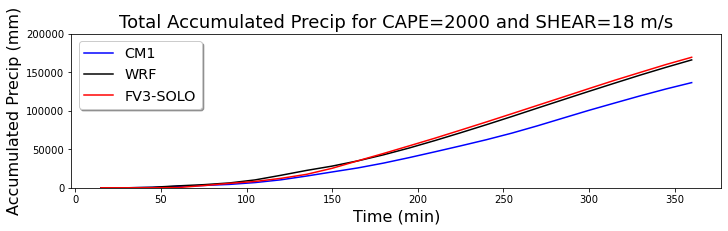

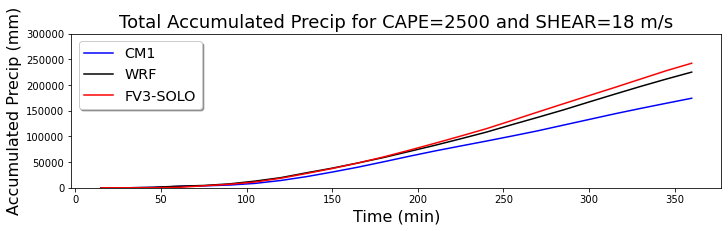

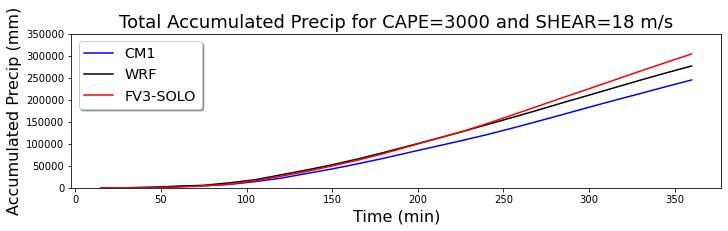

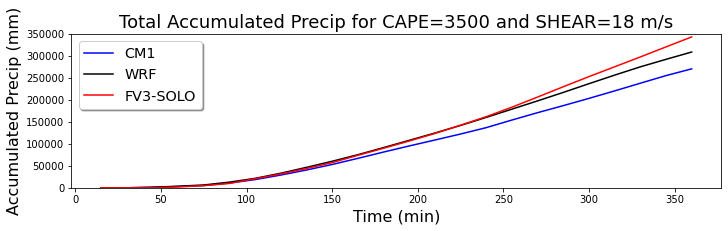

In [135]:
time = 15+15*np.arange(24)
x = np.arange(5)

plim = [[1.0e5, 1.5e5, 2.0e5, 3.0e5, 3.25e5],[1.0e5, 1.5e5, 2.0e5, 3.0e5, 3.25e5], [1.5e5, 2.0e5, 3.0e5, 3.5e5, 3.5e5]]

labels = []
for cape in allcape:
    labels.append("%s" % (cape[1:]))

for m, shear in enumerate(allshear):
    for n, cape in enumerate(allcape):
        label = "%s_%s" % (cape, shear)
        
        fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,3))

        ax.plot(time, cm1[label]['acc_precip'].sum(axis=(1,2)), color='b', linestyle='-', label='CM1')
        ax.plot(time, wrf[label]['acc_precip'].sum(axis=(1,2)), color='k', linestyle='-', label='WRF')
        ax.plot(time, solo[label]['acc_precip'].sum(axis=(1,2)), color='r', linestyle='-', label='FV3-SOLO')

        ax.set_ylabel('Accumulated Precip (mm)', fontsize=16)
        ax.set_xlabel('Time (min)', fontsize=16)
        ax.set_ylim(0, plim[m][n])
        ax.set_title('Total Accumulated Precip for CAPE=%d and SHEAR=%d m/s' % (int(cape[1:]), int(shear)), fontsize=18)
        legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')


        plt.show()

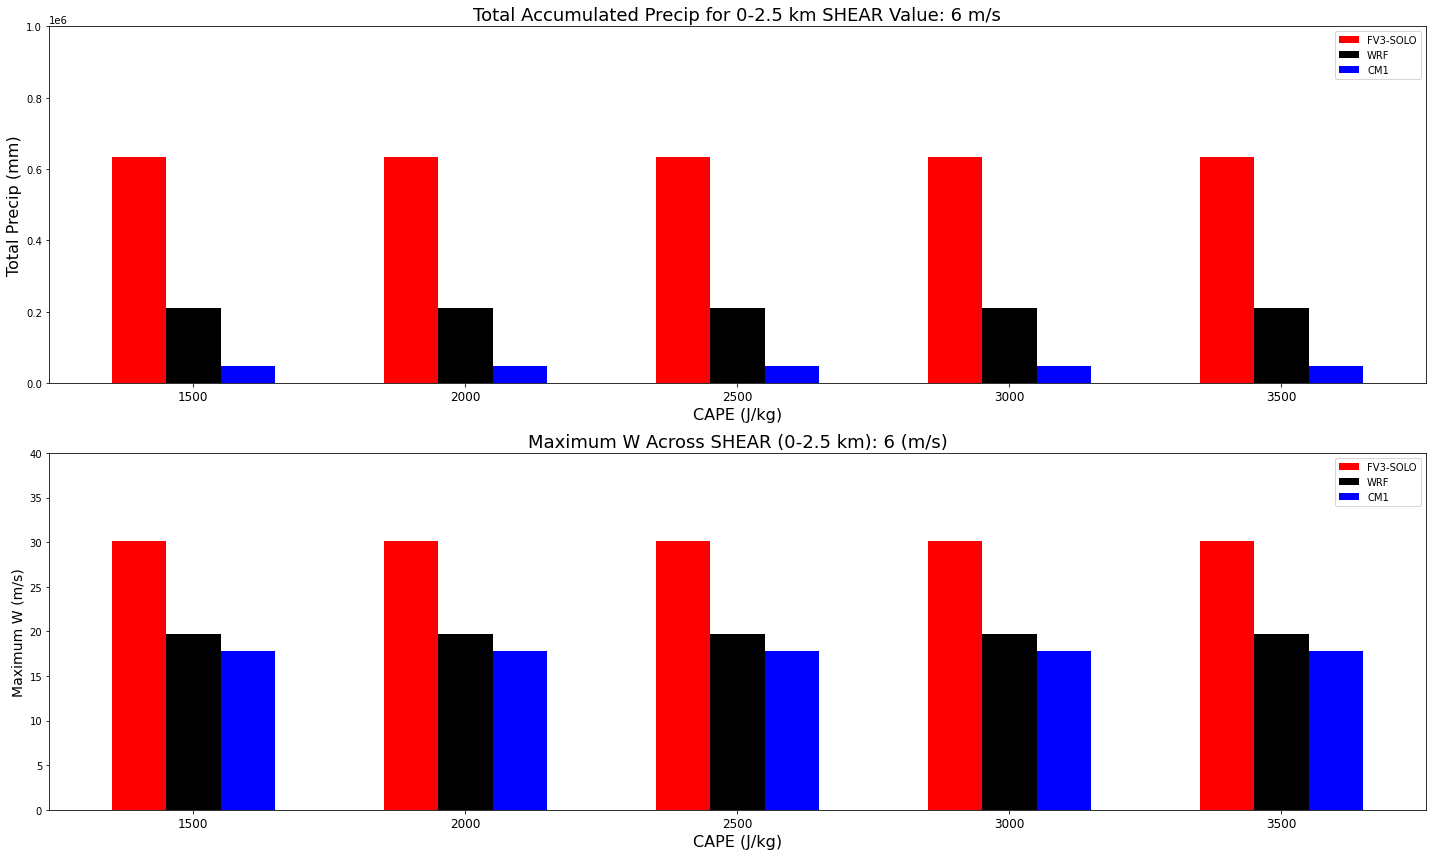

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

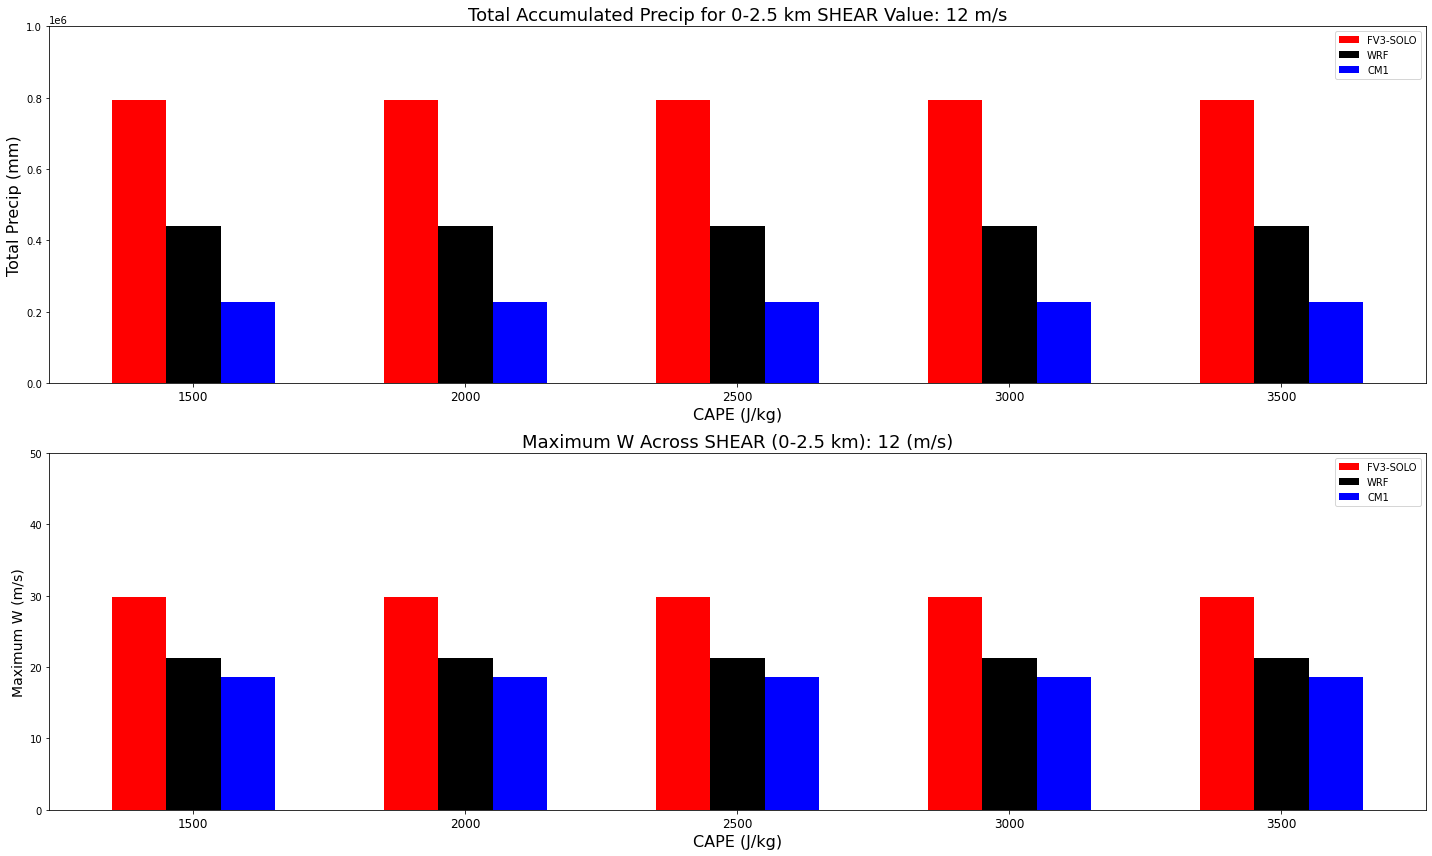

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

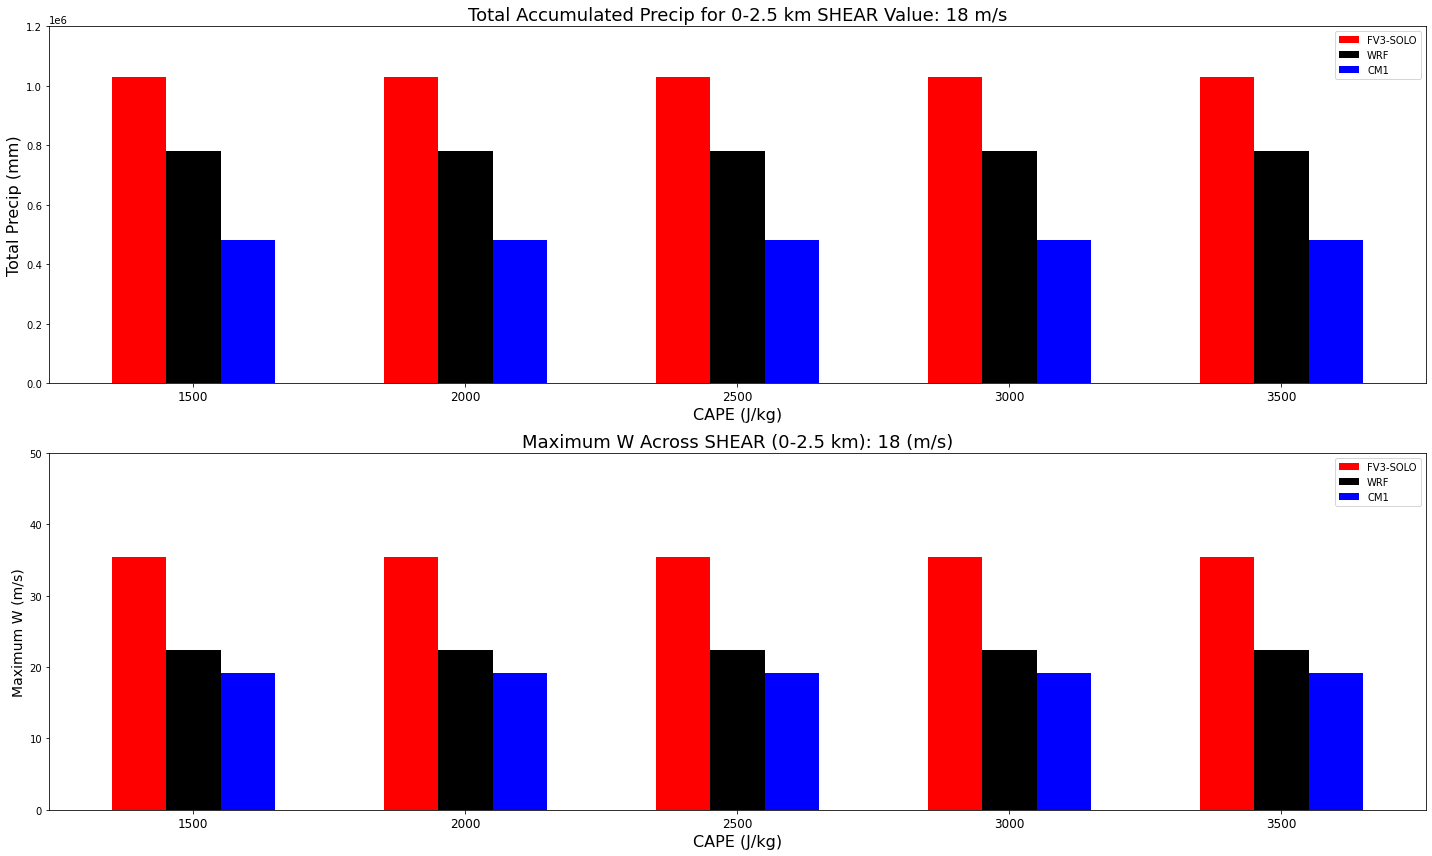

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [117]:
x = np.arange(5)

wlim = [40., 50., 50.]
plim = [1.0e6, 1.0e6, 1.2e6]

labels = []
for cape in allcape:
    labels.append("%s" % (cape[1:]))
    
for n, shear in enumerate(allshear):
    
    fig, axes = plt.subplots(2,1, constrained_layout=True,figsize=(20,12))    

    for cape in allcape:
        label = "%s_%s" % (cape, shear)
        
        ax = axes[0]

        width = 0.2  # the width of the bars
        sbar = ax.bar(x - width, solo[label]['acc_precip'].sum(), width, color='r', label='FV3-SOLO')
        wbar = ax.bar(x ,        wrf[label]['acc_precip'].sum(), width, color='k', label='WRF')
        cbar = ax.bar(x + width, cm1[label]['acc_precip'].sum(), width, color='b', label='CM1')
        
        ax.set_ylabel('Total Precip (mm)', fontsize=16)
        ax.set_xlabel('CAPE (J/kg)', fontsize=16)
        ax.set_ylim(0, plim[n])
        ax.set_title('Total Accumulated Precip for 0-2.5 km SHEAR Value: %d m/s' % int(shear), fontsize=18)
        ax.set_xticks(x, labels, fontsize=12)
        ax.legend()
        
        ax = axes[1]
        
        width = 0.2  # the width of the bars
        sbar = ax.bar(x - width, solo[label]['w'].max(), width, color='r', label='FV3-SOLO')
        wbar = ax.bar(x ,        wrf[label]['w'].max(), width, color='k', label='WRF')
        cbar = ax.bar(x + width, cm1[label]['w'].max(), width, color='b', label='CM1')
        
        ax.set_ylabel('Maximum W (m/s)', fontsize=14)
        ax.set_xlabel('CAPE (J/kg)', fontsize=16)
        ax.set_ylim(0, wlim[n])
        ax.set_title('Maximum W Across SHEAR (0-2.5 km): %d (m/s)' % int(shear), fontsize=18)
        ax.set_xticks(x, labels, fontsize=12)
        ax.legend()
        
        fig.tight_layout()
        
        plt.savefig('squall_3km_%s.png' % label, dpi=300)

        plt.show()



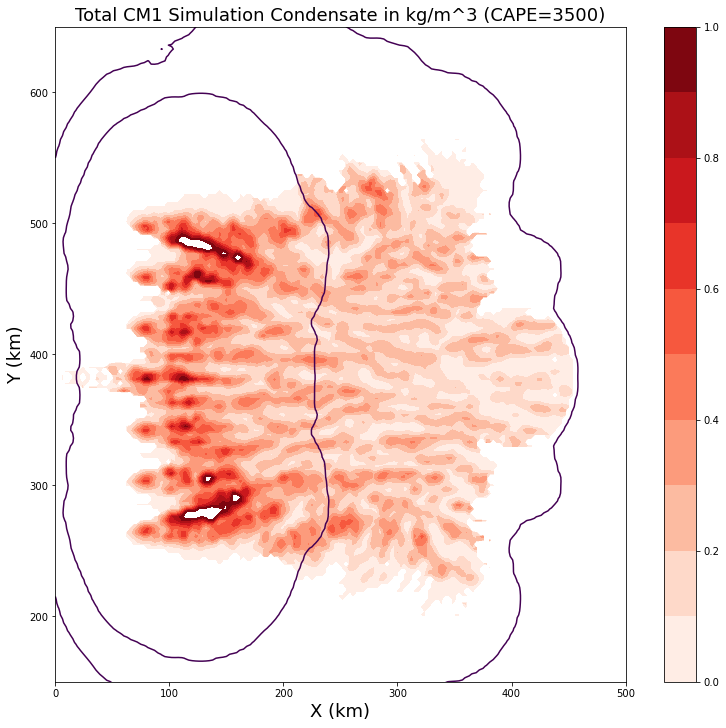

In [161]:
sfld = np.where(cm1.cond.sum(axis=(0,1)) < 0.01, -1., solo.cond.sum(axis=(0,1)))

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,10))
#cs = plt.contourf(x,x,solo.cond.sum(axis=(0,1)), levels=levels, cmap="Reds")
cs = plt.contourf(x,x,sfld, levels=levels, cmap="Reds")
ax.set_ylabel('Y (km)', fontsize=18)
ax.set_xlabel('X (km)', fontsize=18)
ax.set_title('Total CM1 Simulation Condensate in kg/m^3 (CAPE=3500)', fontsize=18)
ax.set_xlim(0,500)
ax.set_ylim(150,650)
colorbar = plt.colorbar(cs)
plt.contour(x,x,cm1.thetap[24,1], levels=[-1.], color='k')
plt.contour(x,x,cm1.thetap[12,1], levels=[-1.], color='k')

plt.show()
#print(cm1.thetap[12,1].min(), cm1.thetap[24,1].min())

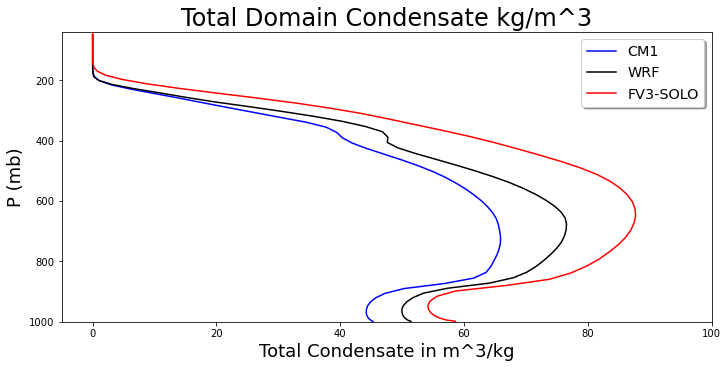

In [165]:
cm1z = cm1.z3d.sum(axis=(0,2,3))
wrfz = wrf.z3d.sum(axis=(0,2,3))
soloz = -solo.z3d.sum(axis=(0,2,3))

cm1p = cm1.pres.mean(axis=(0,2,3))/100.
wrfp = wrf.pres.mean(axis=(0,2,3))/100.
solop = solo.pres.mean(axis=(0,2,3))/100.
# cm1p  = cm1.den.mean(axis=(0,2,3))
# solop = solo.den.mean(axis=(0,2,3))
# wrfp  = wrf.den.mean(axis=(0,2,3))

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,5))

ax.plot(cm1.cond.sum(axis=(0,2,3)), cm1p, color='b', linestyle='-', label='CM1')
ax.plot(wrf.cond.sum(axis=(0,2,3)), wrfp, color='k', linestyle='-', label='WRF')
ax.plot(solo.cond.sum(axis=(0,2,3)), solop, color='r', linestyle='-', label='FV3-SOLO')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.set_title('Total Domain Condensate kg/m^3', fontsize=24)
ax.set_ylabel('P (mb)', fontsize=18)
ax.set_xlabel('Total Condensate in m^3/kg', fontsize=18)
ax.set_ylim(1000,40.)
ax.set_xlim(-5,100)

plt.show()



In [5]:
# WRF output is accumulated precip over whole run - fix that
wrf4_precip = wrf4_acc_prec.copy().reshape((24,256,256))
wrf3_precip = wrf3_acc_prec.copy().reshape((24,256,256))
for n in np.arange(22,0,-1):
    wrf4_precip[n+1] = wrf4_precip[n+1] - wrf4_precip[n]
    wrf3_precip[n+1] = wrf3_precip[n+1] - wrf3_precip[n]

# FV3 QPF is for 5 min intervals - do it for 15 min.
fv3A_total_precip = 3*fv3A_precip.sum(axis=(1,2))
fv3B_total_precip = 3*fv3B_precip.sum(axis=(1,2))

wrf3_total_precip = wrf3_precip.sum(axis=(1,2))
wrf4_total_precip = wrf4_precip.sum(axis=(1,2))

# FV3 QPF is for 5 min intervals - do it for 15 min.
fv3A_cond_total = fv3A_cond.sum(axis=(1,2,3))
fv3B_cond_total = fv3B_cond.sum(axis=(1,2,3))

wrf3_cond_total = wrf3_cond.sum(axis=(1,2,3))
wrf4_cond_total = wrf4_cond.sum(axis=(1,2,3))

time = 15.0 + 15*np.arange(24)

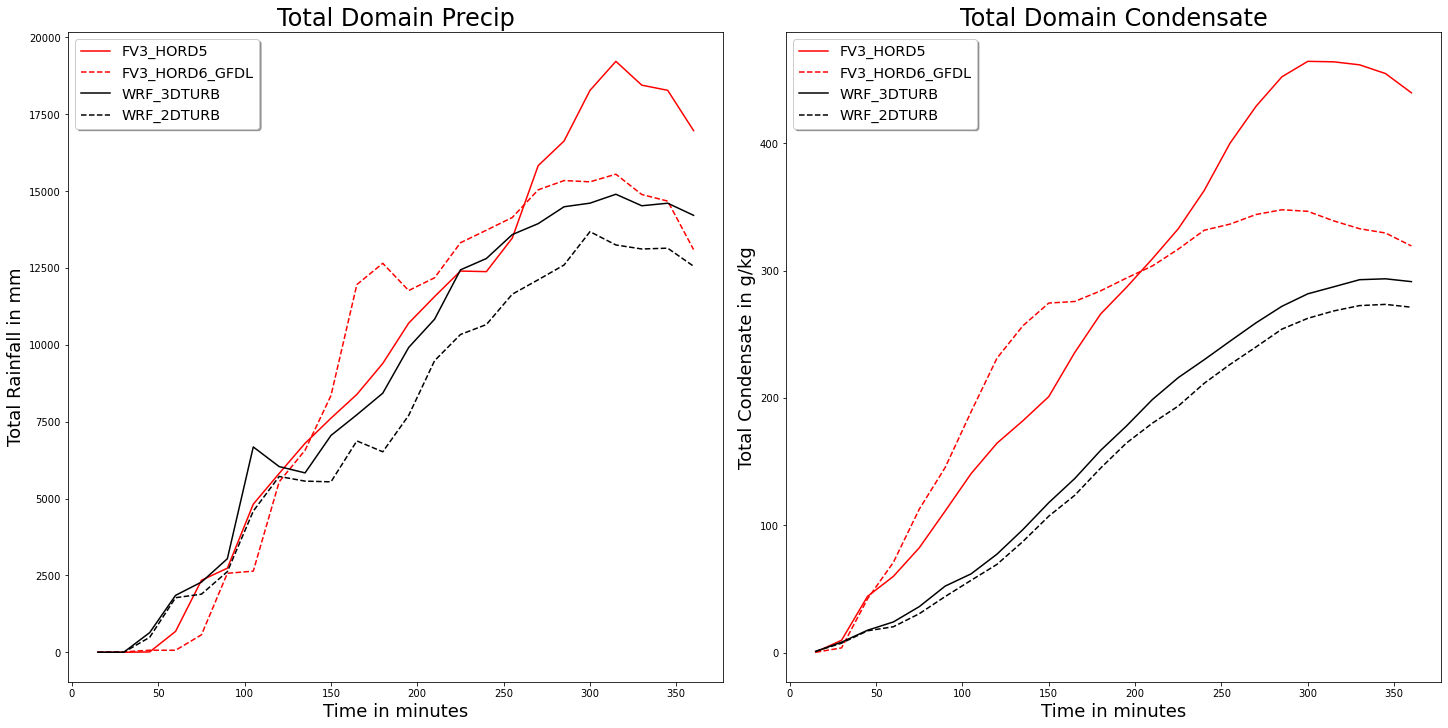

In [6]:
fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))

ax[0].plot(time, fv3A_total_precip, color='r', linestyle='-', label='FV3_HORD5')
ax[0].plot(time, fv3B_total_precip, color='r', linestyle='--', label='FV3_HORD6_GFDL')

ax[0].plot(time, wrf3_total_precip, color='k', linestyle='-', label='WRF_3DTURB')
ax[0].plot(time, wrf4_total_precip, color='k', linestyle='--', label='WRF_2DTURB')

legend = ax[0].legend(loc='upper left', shadow=True, fontsize='x-large')
ax[0].set_title('Total Domain Precip', fontsize=24)
ax[0].set_xlabel('Time in minutes', fontsize=18)
ax[0].set_ylabel('Total Rainfall in mm', fontsize=18)

#

ax[1].plot(time, fv3A_cond_total, color='r', linestyle='-', label='FV3_HORD5')
ax[1].plot(time, fv3B_cond_total, color='r', linestyle='--', label='FV3_HORD6_GFDL')

ax[1].plot(time, wrf3_cond_total, color='k', linestyle='-', label='WRF_3DTURB')
ax[1].plot(time, wrf4_cond_total, color='k', linestyle='--', label='WRF_2DTURB')

legend = ax[1].legend(loc='upper left', shadow=True, fontsize='x-large')
ax[1].set_title('Total Domain Condensate', fontsize=24)
ax[1].set_xlabel('Time in minutes', fontsize=18)
ax[1].set_ylabel('Total Condensate in g/kg', fontsize=18)

plt.savefig('SquallLine_precip_cond.png', dpi=300)


In [83]:
plt.savefig('SquallLine_precip_cond.png')

<Figure size 432x288 with 0 Axes>